In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")

Libraries imported successfully!
Current working directory: c:\Users\User\Desktop\data analysis\CORD-19-DATA-ANALYSIS\notebooks


In [4]:
# Load the dataset
try:
    df = pd.read_csv('../raw_data/metadata.csv', low_memory=False)
    print(f"✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except FileNotFoundError:
    print("❌ Error: metadata.csv not found in raw_data folder")
    print("Please ensure the file is in the correct location")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Data loaded successfully!
Dataset shape: (1056660, 19)
Memory usage: 2784.27 MB


In [5]:
# Display basic information about the dataset
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

DATASET OVERVIEW
Number of rows: 1,056,660
Number of columns: 19

Column names:
 1. cord_uid
 2. sha
 3. source_x
 4. title
 5. doi
 6. pmcid
 7. pubmed_id
 8. license
 9. abstract
10. publish_time
11. authors
12. journal
13. mag_id
14. who_covidence_id
15. arxiv_id
16. pdf_json_files
17. pmc_json_files
18. url
19. s2_id


In [6]:
# Display first few rows
print("\n" + "=" * 50)
print("FIRST 5 ROWS")
print("=" * 50)
df.head()


FIRST 5 ROWS


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [7]:
# Data types and memory usage
print("\n" + "=" * 50)
print("DATA TYPES AND MEMORY USAGE")
print("=" * 50)
df.info(memory_usage='deep')


DATA TYPES AND MEMORY USAGE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    37

In [8]:
# Analyze missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0]

print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS
                  Missing Count  Percentage
mag_id                  1056660  100.000000
arxiv_id                1042411   98.651506
pmc_json_files           740918   70.118865
pdf_json_files           682894   64.627600
sha                      682894   64.627600
pmcid                    667089   63.131849
who_covidence_id         573725   54.296084
pubmed_id                557728   52.782163
doi                      399880   37.843772
url                      369726   34.990063
abstract                 235544   22.291371
journal                   87322    8.263964
s2_id                     80192    7.589196
authors                   23869    2.258910
publish_time               1814    0.171673
title                       503    0.047603


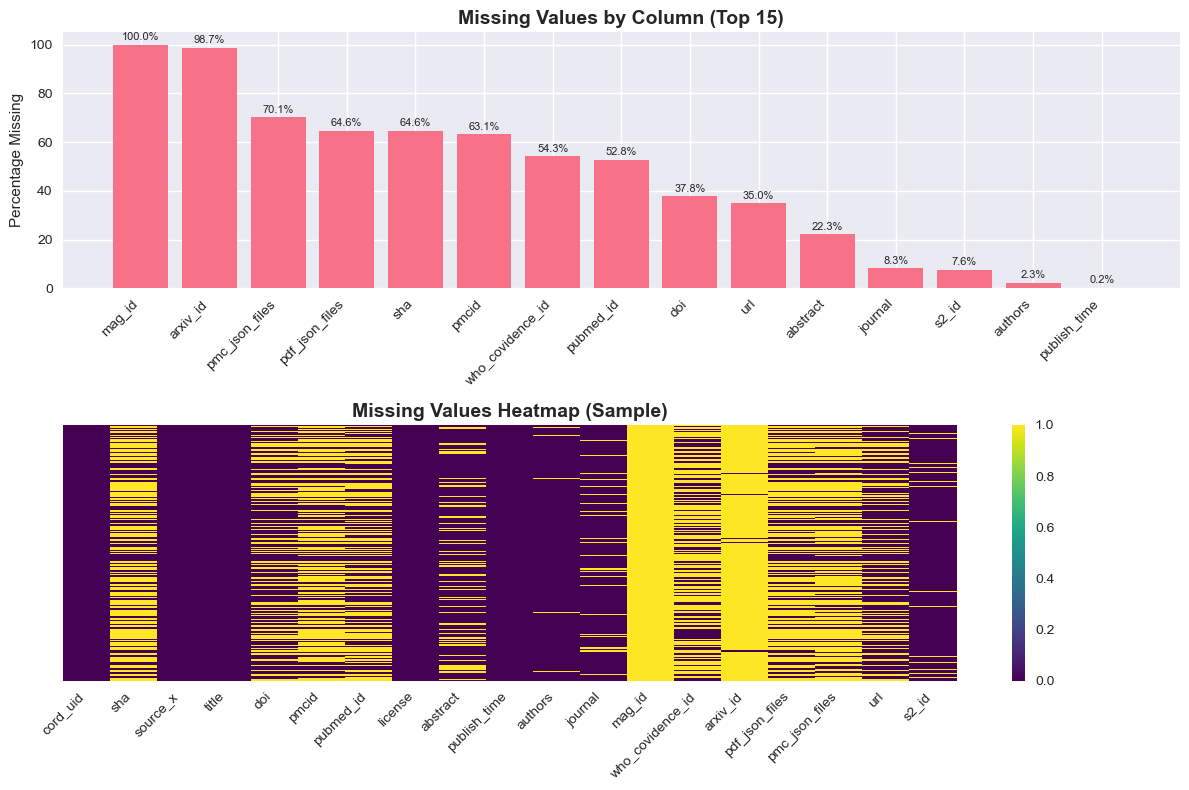

📊 Missing values visualization saved to: ../visuals/missing_values_analysis.png


In [9]:
# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 8))
    
    # Plot missing values percentage
    top_missing = missing_df.head(15)  # Top 15 columns with missing values
    
    plt.subplot(2, 1, 1)
    bars = plt.bar(range(len(top_missing)), top_missing['Percentage'])
    plt.title('Missing Values by Column (Top 15)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage Missing')
    plt.xticks(range(len(top_missing)), top_missing.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, pct in zip(bars, top_missing['Percentage']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)
    
    # Create a heatmap for missing values (sample of data)
    plt.subplot(2, 1, 2)
    sample_df = df.sample(min(1000, len(df)))  # Sample for visualization
    sns.heatmap(sample_df.isnull(), cbar=True, yticklabels=False, 
                cmap='viridis', xticklabels=True)
    plt.title('Missing Values Heatmap (Sample)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig('../visuals/missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"📊 Missing values visualization saved to: ../visuals/missing_values_analysis.png")

In [10]:
# Analyze key columns
key_columns = ['title', 'abstract', 'authors', 'publish_time', 'journal', 'source_x']

print("=" * 60)
print("KEY COLUMNS ANALYSIS")
print("=" * 60)

for col in key_columns:
    if col in df.columns:
        non_null_count = df[col].notna().sum()
        unique_count = df[col].nunique()
        print(f"\n📋 {col.upper()}:")
        print(f"   Non-null entries: {non_null_count:,} ({non_null_count/len(df)*100:.1f}%)")
        print(f"   Unique values: {unique_count:,}")
        
        # Sample values
        if non_null_count > 0:
            sample_values = df[col].dropna().head(3).tolist()
            print(f"   Sample values:")
            for i, val in enumerate(sample_values, 1):
                val_str = str(val)[:100] + "..." if len(str(val)) > 100 else str(val)
                print(f"     {i}. {val_str}")
    else:
        print(f"\n❌ Column '{col}' not found in dataset")

KEY COLUMNS ANALYSIS

📋 TITLE:
   Non-null entries: 1,056,157 (100.0%)
   Unique values: 850,366
   Sample values:
     1. Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Ho...
     2. Nitric oxide: a pro-inflammatory mediator in lung disease?
     3. Surfactant protein-D and pulmonary host defense

📋 ABSTRACT:
   Non-null entries: 821,116 (77.7%)
   Unique values: 730,712
   Sample values:
     1. OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 pa...
     2. Inflammatory diseases of the respiratory tract are commonly associated with elevated production of n...
     3. Surfactant protein-D (SP-D) participates in the innate response to inhaled microorganisms and organi...

📋 AUTHORS:
   Non-null entries: 1,032,791 (97.7%)
   Unique values: 796,659
   Sample values:
     1. Madani, Tariq A; Al-Ghamdi, Aisha A
     2. Vliet, Albert van der; Eiserich, Jason P; Cross, Carroll E
     3. Crouch

In [11]:
# Analyze publication dates
if 'publish_time' in df.columns:
    print("=" * 60)
    print("PUBLICATION DATE ANALYSIS")
    print("=" * 60)
    
    # Check date formats and convert
    date_col = df['publish_time'].dropna()
    print(f"Non-null publish_time entries: {len(date_col):,}")
    
    # Sample date formats
    print(f"\nSample date formats:")
    for i, date in enumerate(date_col.head(10), 1):
        print(f"  {i:2d}. {date}")
    
    # Try to convert to datetime
    try:
        df['publish_date'] = pd.to_datetime(df['publish_time'], errors='coerce')
        valid_dates = df['publish_date'].notna().sum()
        print(f"\n✅ Successfully converted {valid_dates:,} dates")
        
        if valid_dates > 0:
            df['publish_year'] = df['publish_date'].dt.year
            df['publish_month'] = df['publish_date'].dt.month
            
            # Date range
            min_date = df['publish_date'].min()
            max_date = df['publish_date'].max()
            print(f"Date range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
            
            # Year distribution
            year_counts = df['publish_year'].value_counts().sort_index()
            print(f"\nPublications by year (top 10):")
            print(year_counts.head(10))
            
    except Exception as e:
        print(f"❌ Error converting dates: {e}")
else:
    print("❌ No 'publish_time' column found")

PUBLICATION DATE ANALYSIS
Non-null publish_time entries: 1,054,846

Sample date formats:
   1. 2001-07-04
   2. 2000-08-15
   3. 2000-08-25
   4. 2001-02-22
   5. 2001-05-11
   6. 2001-12-17
   7. 2001-03-08
   8. 2001-05-02
   9. 2003-08-07
  10. 2003-09-01

✅ Successfully converted 518,871 dates
Date range: 1856-04-01 to 2024-04-20

Publications by year (top 10):
publish_year
1856.0    3
1857.0    1
1860.0    2
1864.0    1
1876.0    1
1878.0    1
1879.0    1
1900.0    1
1902.0    1
1903.0    1
Name: count, dtype: int64


In [12]:
# Analyze text lengths
text_columns = ['title', 'abstract']

print("=" * 60)
print("TEXT LENGTH ANALYSIS")
print("=" * 60)

for col in text_columns:
    if col in df.columns:
        # Calculate text lengths
        text_lengths = df[col].dropna().str.len()
        word_counts = df[col].dropna().str.split().str.len()
        
        print(f"\n📝 {col.upper()} STATISTICS:")
        print(f"   Character length - Mean: {text_lengths.mean():.1f}, Median: {text_lengths.median():.1f}")
        print(f"   Character length - Min: {text_lengths.min()}, Max: {text_lengths.max()}")
        print(f"   Word count - Mean: {word_counts.mean():.1f}, Median: {word_counts.median():.1f}")
        print(f"   Word count - Min: {word_counts.min()}, Max: {word_counts.max()}")
        
        # Store for later use
        df[f'{col}_length'] = df[col].str.len()
        df[f'{col}_word_count'] = df[col].str.split().str.len()

TEXT LENGTH ANALYSIS

📝 TITLE STATISTICS:
   Character length - Mean: 99.1, Median: 95.0
   Character length - Min: 2, Max: 1504
   Word count - Mean: 13.4, Median: 13.0
   Word count - Min: 1, Max: 215

📝 ABSTRACT STATISTICS:
   Character length - Mean: 1461.5, Median: 1437.0
   Character length - Min: 1, Max: 122392
   Word count - Mean: 211.8, Median: 207.0
   Word count - Min: 1, Max: 18000


In [13]:
# Generate summary statistics
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)

summary_stats = {
    'Total Records': len(df),
    'Total Columns': len(df.columns),
    'Memory Usage (MB)': df.memory_usage(deep=True).sum() / 1024**2,
    'Records with Title': df['title'].notna().sum() if 'title' in df.columns else 0,
    'Records with Abstract': df['abstract'].notna().sum() if 'abstract' in df.columns else 0,
    'Records with Valid Dates': df['publish_date'].notna().sum() if 'publish_date' in df.columns else 0,
    'Unique Journals': df['journal'].nunique() if 'journal' in df.columns else 0,
    'Date Range Years': (df['publish_year'].max() - df['publish_year'].min()) if 'publish_year' in df.columns else 0
}

for key, value in summary_stats.items():
    if isinstance(value, float) and key == 'Memory Usage (MB)':
        print(f"📊 {key}: {value:.2f}")
    else:
        print(f"📊 {key}: {value:,}")

print("\n✅ Data exploration completed successfully!")
print("\n📝 Key Findings:")
print(f"   • Dataset contains {len(df):,} research papers")
print(f"   • Date range: {df['publish_year'].min() if 'publish_year' in df.columns else 'N/A'} - {df['publish_year'].max() if 'publish_year' in df.columns else 'N/A'}")
print(f"   • Most papers have titles ({df['title'].notna().sum()/len(df)*100:.1f}% coverage)\" if 'title' in df.columns else \"")
print(f"   • Abstract coverage: {df['abstract'].notna().sum()/len(df)*100:.1f}%\" if 'abstract' in df.columns else \"")
print(f"\n🎯 Ready to proceed with data cleaning and analysis!")

DATASET SUMMARY
📊 Total Records: 1,056,660
📊 Total Columns: 26
📊 Memory Usage (MB): 2840.70
📊 Records with Title: 1,056,157
📊 Records with Abstract: 821,116
📊 Records with Valid Dates: 518,871
📊 Unique Journals: 54,993
📊 Date Range Years: 168.0

✅ Data exploration completed successfully!

📝 Key Findings:
   • Dataset contains 1,056,660 research papers
   • Date range: 1856.0 - 2024.0
   • Most papers have titles (100.0% coverage)" if 'title' in df.columns else "
   • Abstract coverage: 77.7%" if 'abstract' in df.columns else "

🎯 Ready to proceed with data cleaning and analysis!
